In [9]:
import ckt
from ckt import *
from matplotlib.lines import Line2D

Running Simulation ... Memory: 230.84 MB
done, stored values, time taken =  0.4228229522705078
Memory: 237.88 MB
done, stored values, time taken =  0.4223055839538574
Memory: 238.27 MB
done, stored values, time taken =  0.4548478126525879
Memory: 238.27 MB
done, stored values, time taken =  0.47576355934143066
Memory: 238.27 MB
done, stored values, time taken =  0.5350091457366943
Memory: 238.27 MB
done, stored values, time taken =  0.576556921005249
Memory: 238.27 MB
done, stored values, time taken =  0.5550355911254883
Memory: 238.27 MB
done, stored values, time taken =  0.6344549655914307
Memory: 238.27 MB
done, stored values, time taken =  0.5983161926269531
Memory: 238.27 MB
done, stored values, time taken =  0.6072421073913574
Memory: 238.27 MB
done, stored values, time taken =  0.6405868530273438
Memory: 238.27 MB
done, stored values, time taken =  0.6781878471374512
Memory: 238.27 MB
done, stored values, time taken =  0.7751421928405762
Memory: 238.27 MB
done, stored values, ti

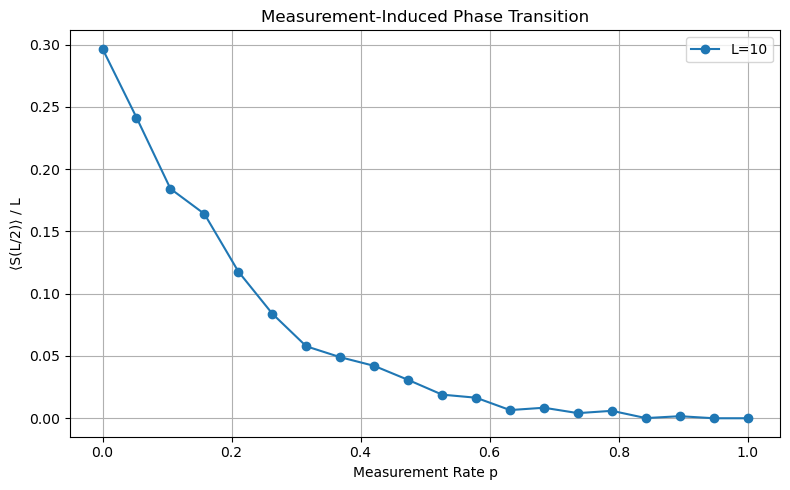

In [2]:

L = 10      # number of qubits
depth = 20      # circuit depth
n_avg = 20       # number of runs to average over

p_vals = np.linspace(0.0, 1.0, 20)
entropy_vals = []

print("Running Simulation ... ", end="", flush=True)
for p in p_vals:
    t0 = time.time()
    print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")
    print(f"p = {p:.2f}", end="\r")
    S = ckt.simulate(L, depth, p, n_avg)
    
    entropy_vals.append(S)
    print("done, stored values, time taken = ",(time.time()-t0), flush=True)
    del S
    gc.collect()
print("done", flush=True)
# Plot
plt.figure(figsize=(8, 5))
plt.plot(p_vals, entropy_vals, marker='o', label=f'L={L}')
plt.xlabel('Measurement Rate p')
plt.ylabel('⟨S(L/2)⟩ / L')
plt.title('Measurement-Induced Phase Transition')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
l_list=[8,10,12,14]     # number of qubits
depth = 20      # circuit depth
n_avg = 20       # number of runs to average over
p_vals = np.linspace(0.0, 1, 20)
entropy_vals = {}

for L in l_list:
    enval= []
    print("Running Simulation ... ",L, end="", flush=True)
    for p in p_vals:
        t0 = time.time()
        #print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB", end = '\r')
        print(f"p = {p:.2f}", end="\r")
        S = ckt.simulate(L, depth, p, n_avg)
        
        enval.append(S)
        #print("done, stored values, time taken = ",(time.time()-t0), flush=True, end = '\r')
        del S
        gc.collect()

    entropy_vals[L]=enval




<Figure size 800x500 with 0 Axes>

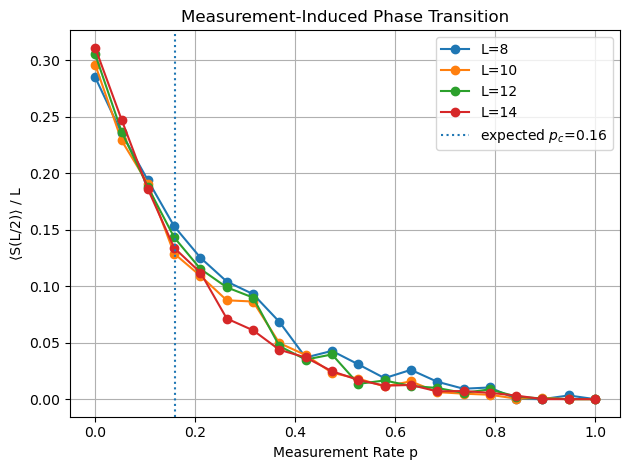

In [5]:
for L in l_list:
    plt.plot(p_vals, entropy_vals[L], marker='o', label=f'L={L}')

plt.xlabel('Measurement Rate p')
plt.ylabel('⟨S(L/2)⟩ / L')
plt.title('Measurement-Induced Phase Transition')
plt.grid(True)
plt.axvline(0.16,linestyle=':',label=rf'expected $p_c$=0.16')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
phase_data = {}
phase_data['s'] = entropy_vals
phase_data['p'] = p_vals
phase_data['L'] = l_list
np.save('phase_data.npy',phase_data)

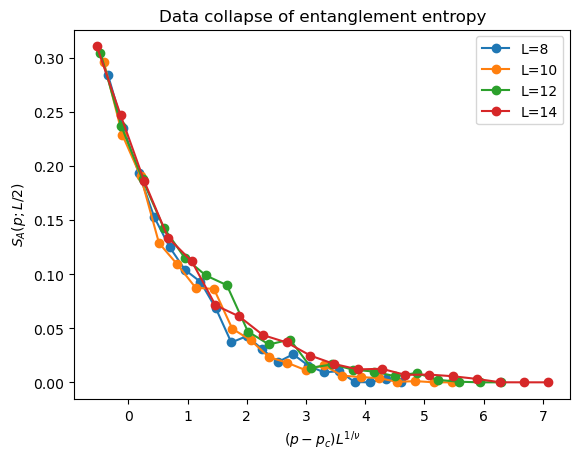

In [26]:
pc = 0.07  #expected to be 0.16
nu = 1.3
for i, L in enumerate(l_list):
    x = (p_vals - pc) * L**(1/nu)
    #x= (p - pc) * L**(1/nu)
    plt.plot(x, entropy_vals[L], 'o-', label=f'L={L}')

plt.xlabel('$(p - p_c) L^{1/\\nu}$')
plt.ylabel('$S_A(p; L/2)$')
plt.title('Data collapse of entanglement entropy')
plt.legend()
plt.show()

In [7]:

l_list= [8,12,16]      # number of qubits
#depth = 20      # circuit depth
n_avg = 20       # number of runs to average over
d_list = np.linspace(0,30,10,dtype= np.intp)
p_vals = np.linspace(1,0.02,6)
entropy_vals_d = {}

print("Running Simulation ... ", end="", flush=True)
for L in l_list:
    
    for p in p_vals:
        entropy_vals_d[(L,p)] = []
        print('for depth =',depth, end ='\r')
        for depth in d_list:
            
            t0 = time.time()
            #print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB",end="\r")
            print(f"l,p = {L},{p:.2f}", end="\r")
            S = ckt.simulate(L, depth, p, n_avg)
            
            entropy_vals_d[(L,p)].append(S)
            print("done, stored values, time taken = ",(time.time()-t0), flush=True,end='\r')
            del S
            gc.collect()
        print("done",depth, flush=True)
        # Plot



done 30tored values, time taken =  0.9033148288726807466
done 30tored values, time taken =  0.8953976631164551547
done 30tored values, time taken =  0.717287063598632835
done 30tored values, time taken =  0.6852002143859863669
done 30tored values, time taken =  0.5315117835998535688
done 30tored values, time taken =  0.4289491176605224662
done 30tored values, time taken =  3.013607978820801272
done 30tored values, time taken =  2.9386165142059326203
done 30tored values, time taken =  2.368215322494507956
done 30tored values, time taken =  2.0508060455322266225
done 30tored values, time taken =  1.6927032470703125212
done 30tored values, time taken =  1.552014350891113335
done 30tored values, time taken =  24.087341785430908
done 30tored values, time taken =  20.559131383895874
done 30tored values, time taken =  16.7800812721252445
done 30tored values, time taken =  13.4576187133789067
done 30tored values, time taken =  9.82418537139892644
done 30tored values, time taken =  6.2003986835

In [ ]:
steady_state_data = {}
steady_state_data['s'] = entropy_vals_d
steady_state_data['p'] = p_vals
steady_state_data['L'] = l_list
steady_state_data['d']=d_list
np.save('steady_state.npy',steady_state_data)

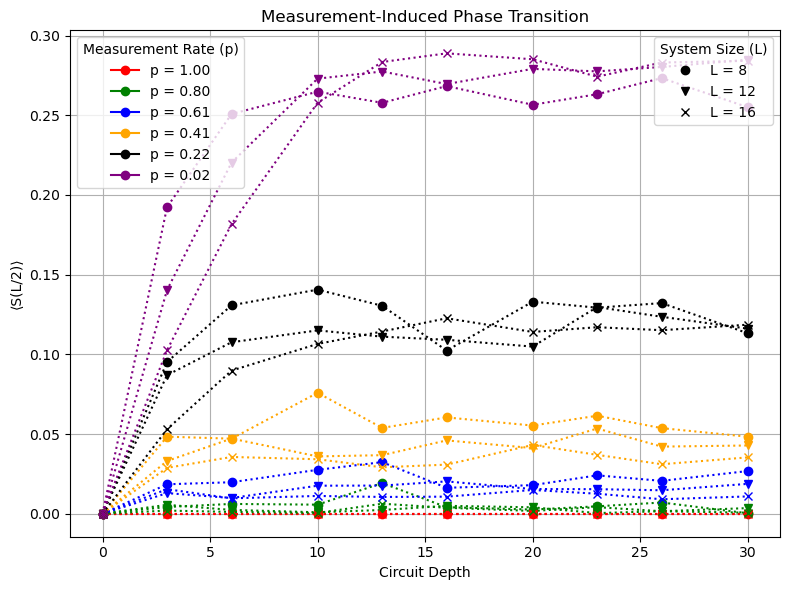

In [10]:


plt.figure(figsize=(8, 6))

markers = ['o', 'v', 'x']
pcols = ['r', 'g', 'b', 'orange', 'black', 'purple']

assert len(l_list) <= len(markers), "Add more markers if needed"
assert len(p_vals) <= len(pcols), "Add more colors if needed"

# Plot curves
for i, l in enumerate(l_list):
    mark = markers[i]
    for j, p in enumerate(p_vals):
        entp = entropy_vals_d[(l, p)]
        plt.plot(d_list, entp, marker=mark, color=pcols[j], linestyle=':')

# Create custom legend for p (colors)
p_legend = [Line2D([0], [0], color=pcols[j], marker='o', linestyle='-', label=f'p = {p:.2f}')
            for j, p in enumerate(p_vals)]

# Create custom legend for L (markers)
l_legend = [Line2D([0], [0], color='k', marker=markers[i], linestyle='None', label=f'L = {l}')
            for i, l in enumerate(l_list)]

# Add legends
legend1 = plt.legend(handles=p_legend, title='Measurement Rate (p)', loc='upper left')
legend2 = plt.legend(handles=l_legend, title='System Size (L)', loc='upper right')
plt.gca().add_artist(legend1)


plt.xlabel('Circuit Depth')
plt.ylabel('⟨S(L/2)⟩')
plt.title('Measurement-Induced Phase Transition')
plt.grid(True)
plt.tight_layout()
#plt.savefig('steady_state_proof_L.png')
plt.show()


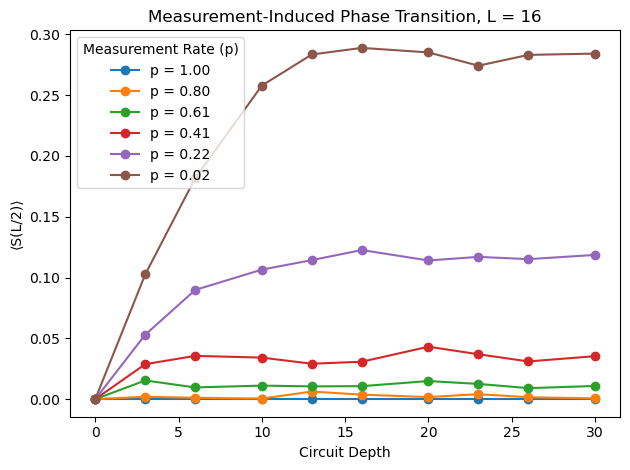

In [14]:

plt.figure()
   
for pv, p in enumerate(p_vals):
    entp = entropy_vals_d[(16, p)]
    plt.plot(d_list, entp, 'o-',label=f'p = {p:.2f}')

plt.xlabel('Circuit Depth')
plt.ylabel('⟨S(L/2)⟩')
plt.title(f'Measurement-Induced Phase Transition, L = {l}')
plt.legend(title='Measurement Rate (p)')
plt.tight_layout()
#plt.savefig('steady_state_proof.png', dpi=300)
plt.show()

In [28]:

l_list= [6,8,10,12,14]     # number of qubits run for l_list_scale= [6,8,10,12,14,16,18,20,22,24] 
depth = 20      # circuit depth
n_avg = 25       # number of runs to average over

p_values = [0.02,0.16,0.5]
entropy_vals_scale = {}

print("Running Simulation ... ", end="", flush=True)
for p in p_values:
    
    entropy_vals_scale[p] = []
    for L in l_list:
            
        t0 = time.time()
        #print(f"Memory: {process.memory_info().rss / 1e6:.2f} MB")
        print(f"p = {p:.2f}", end="\r")
        S = simulate(L, depth, p, n_avg)
        
        entropy_vals_scale[p].append(S)
        #print(f"done, prob={p}, time taken = ",(time.time()-t0), flush=True)
        del S
        gc.collect()

    
    print("done p,L = ",p,L, flush=True)
    # Plot



done p,L =  0.02 14... p = 0.02
done p,L =  0.16 14
done p,L =  0.5 14


In [ ]:
scaling_ent = {}
scaling_ent['s'] = entropy_vals_scale
scaling_ent['p'] = p_values
scaling_ent['L'] = l_list
np.save('scale_data.npy',scaling_ent)

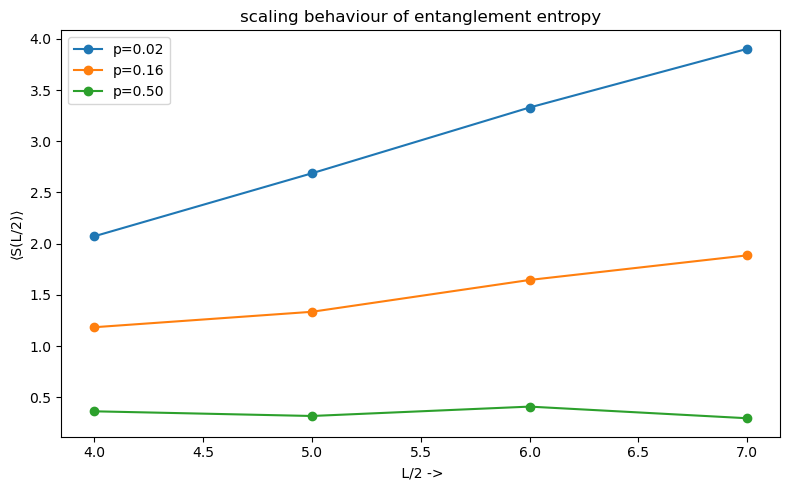

In [30]:
plt.figure(figsize=(8, 5))
for i in p_values: 
    entv = [l*entropy_vals_scale[i][j] for j,l in enumerate(l_list)]
    plt.plot([l/2 for l in l_list], entv,'o-',label = f'p={i:.2f}' )
plt.xlabel(' L/2 ->')
plt.ylabel('⟨S(L/2)⟩')
plt.title('scaling behaviour of entanglement entropy') 
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()